In [2]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
%matplotlib inline

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train.shape
#train.head()
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train['Age'].fillna(train['Age'].median(), inplace = True)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
survived_sex = train[train['Survived'] == 1]['Sex'].value_counts()
survived_sex

female    233
male      109
Name: Sex, dtype: int64

In [7]:
dead_sex = train[train['Survived'] == 0]['Sex'].value_counts()
dead_sex

male      468
female     81
Name: Sex, dtype: int64

### New data frame to plot

          female  male
Survived     233   109
Dead          81   468


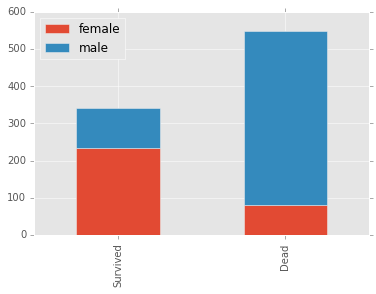

In [8]:
surdea_df = pd.DataFrame([survived_sex, dead_sex])
surdea_df.index = ['Survived','Dead']
print surdea_df
surdea_df.plot(kind = 'bar', stacked = True)

Above bar plot show gender is a very decisive fator in surviving.

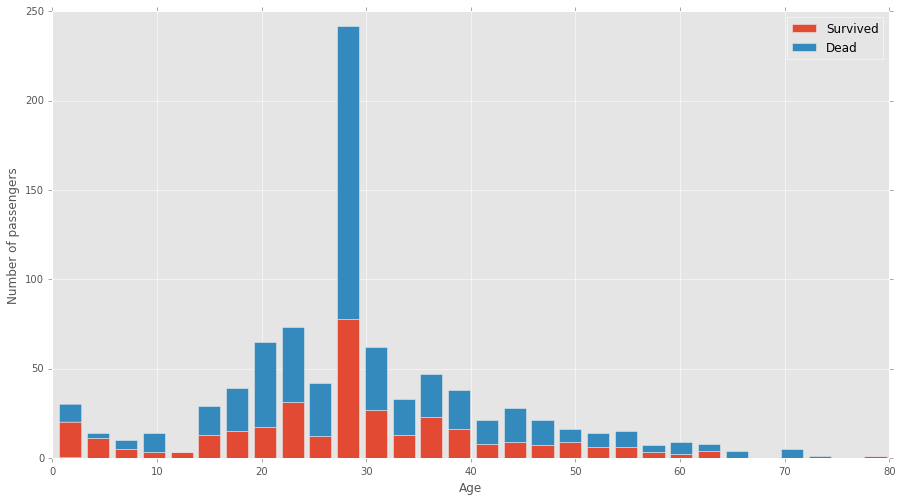

In [9]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived'] == 1]['Age'], train[train['Survived']==0]['Age']], 
         stacked=True, bins = 30, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

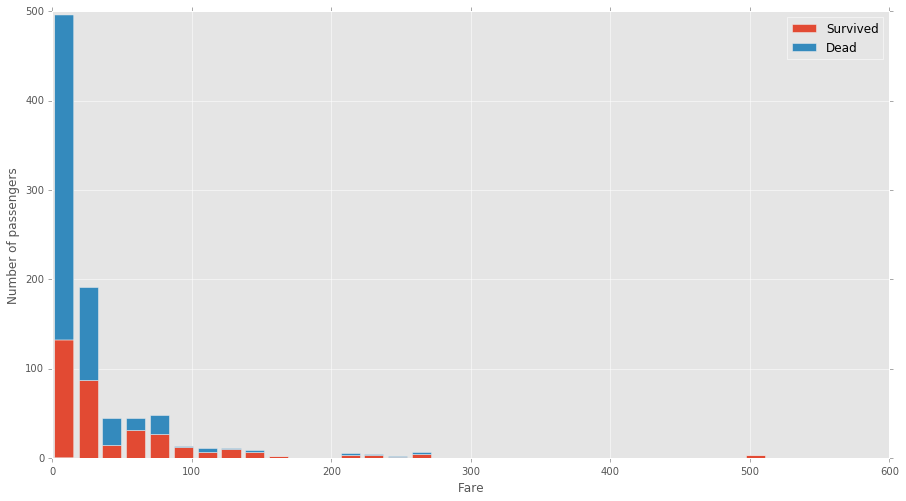

In [10]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, bins = 30, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

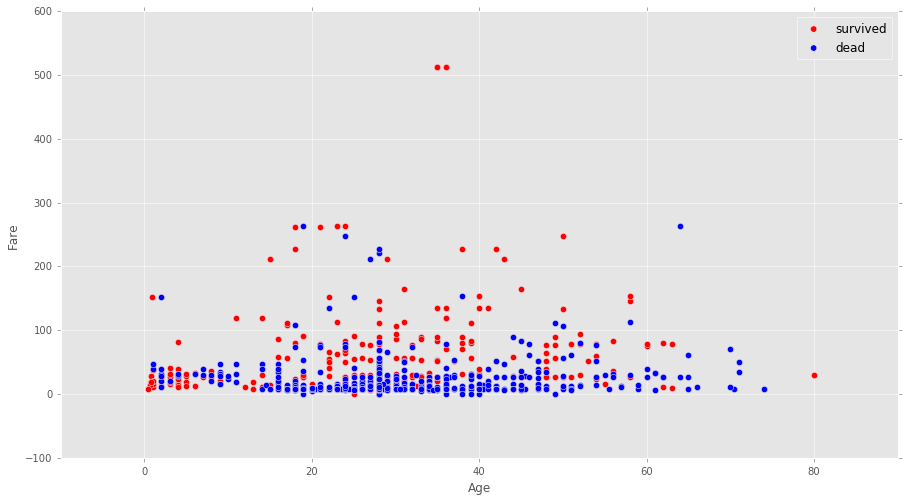

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='red',s=40)
plt.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='blue',s=40)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(('survived','dead'),scatterpoints=1,loc='upper right')

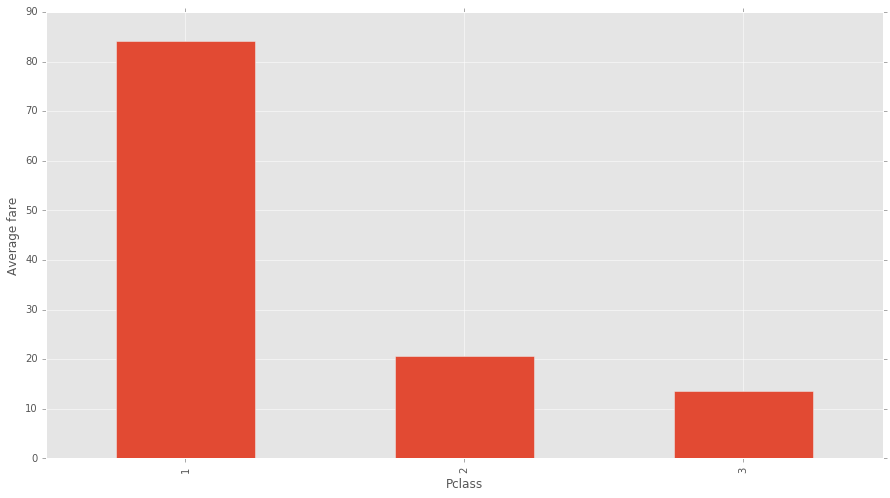

In [12]:
classdata = train.groupby("Pclass").mean()['Fare']
classdata.plot(kind = 'bar',figsize=(15,8))
plt.ylabel('Average fare')

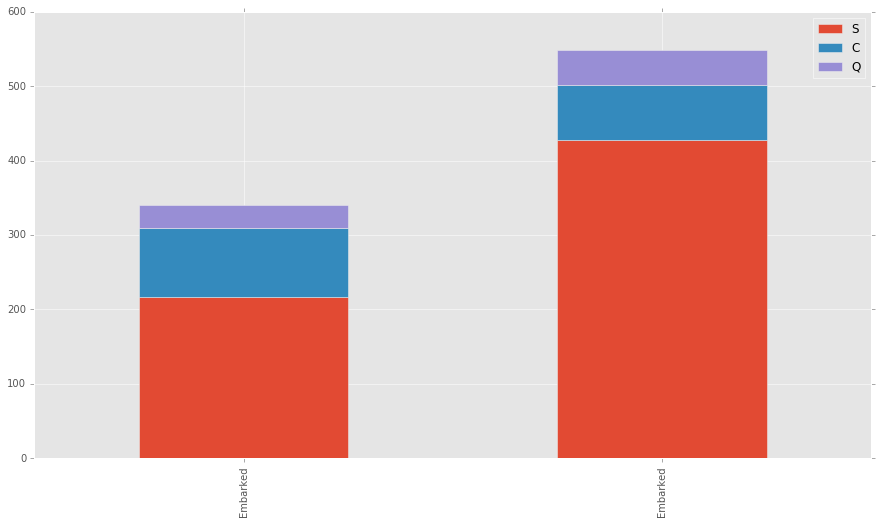

In [13]:
s_embark = train[train['Survived']==1]['Embarked'].value_counts()
d_embark = train[train['Survived']==0]['Embarked'].value_counts()
sd_embark = pd.DataFrame([s_embark, d_embark])
sd_embark.plot(kind='bar', stacked = True, figsize=(15,8))

In [16]:
combined = train.append(test)
combined.reset_index(inplace=True)
combined.tail()
combined.shape

(1309, 13)

In [23]:
combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()).value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: Name, dtype: int64

In [29]:
def get_titles():
    global combined
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

    
    Title_dict = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Mme":        "Mrs",
        "Mlle":       "Miss",
        "Ms":         "Mrs",
        "Mr" :        "Mr",
        "Mrs" :       "Mrs",
        "Miss" :      "Miss",
        "Master" :    "Master",
        "Lady" :      "Royalty"  
    }
    combined['Title'] = combined.Title.map(Title_dict)


In [31]:
get_titles()
combined.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [35]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_train_median = grouped_train.median()
grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()
grouped_train_median

index   Age       Fare  Parch  PassengerId  SibSp  \
Sex    Pclass Title                                                        
female 1      Miss     368.0  29.5   88.25000    0.0        369.0    0.0   
              Mrs      498.0  38.0   79.20000    0.0        499.0    1.0   
              Officer  796.0  49.0   25.92920    0.0        797.0    0.0   
              Royalty  657.5  40.5   63.05000    0.0        658.5    0.5   
       2      Miss     436.5  24.0   13.00000    0.0        437.5    0.0   
              Mrs      438.5  31.5   26.00000    0.0        439.5    1.0   
       3      Miss     371.0  22.0    8.75625    0.0        372.0    0.0   
              Mrs      404.5  29.0   15.97500    1.0        405.5    1.0   
male   1      Master   445.0   4.0  120.00000    2.0        446.0    1.0   
              Mr       462.0  36.0   42.40000    0.0        463.0    0.0   
              Officer  647.0  50.0   35.50000    0.0        648.0    0.0   
              Royalty  599.0  40.0   27.72080    0.0        600.0    0.0   
       2      Master   407.0   1.0   26.00000    1.0        408.0    1.0   
              Mr       439.0  30.0   13.00000    0.0        440.0    0.0   
              Officer  357.5  46.5   13.00000    0.0        358.5    0.0   
       3      Master   269.5   6.5   28.51250    1.0        270.5    3.5   
              Mr       471.0  28.0    7.89580    0.0        472.0    0.0   

                       Survived  
Sex    Pclass Title              
female 1      Miss          1.0  
              Mrs           1.0  
              Officer       1.0  
              Royalty       1.0  
       2      Miss          1.0  
              Mrs           1.0  
       3      Miss          0.5  
              Mrs           0.5  
male   1      Master        1.0  
              Mr            0.0  
              Officer       0.0  
              Royalty       0.0  
       2      Master        1.0  
              Mr            0.0  
              Officer       0.0  
       3      Master        0.0  
              Mr            0.0

In [39]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)

In [47]:
combined.head()['Age']

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [48]:
def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)

In [52]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)

In [51]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)

In [53]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)

In [54]:
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})